# Inspection des propriétés d'une population de personnes

Version du 11 avril 2022

130 individus, cinq caractères: age, n_foyer, lecture_journal, parti, revenu_mensuel




## Importer les librairies nécessaires

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Références bibliographiques


* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* [Statistique descriptive unidimensionnelle](http://wikistat.fr/pdf/st-l-des-uni.pdf) (Site Wikistat)
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Produire les observations

Cf. Hamon, p.4, tableau 1.1

Afin de reproduire ce tableau, on utilise des fonctions produisant des valeur aléatoires.

* On produit d'abord les valeurs aléatoires (remplaçant les observations) pour chaque variable
* On les regroupe ensuite dans un dataframe Pandas
* 130 individus fictifs ont été créés

In [2]:
### Créer une liste d'identifiants
id_list = []
[id_list.append(x) for x in range(1,131)]

print(id_list[-5:])
len(id_list)

[126, 127, 128, 129, 130]


130

In [ ]:
### Créer une liste d'âges
age_list = []
for x in range(1,131):
    age_list.append(random.randint(18,90))

print(age_list[:5])
len(age_list)

In [ ]:
### Créer une liste de nombre de personne dans un foyer
nfoyer_list = []
for x in range(1,131): 
    nfoyer_list.append(random.randint(1,7))

print(nfoyer_list[:5])
len(nfoyer_list)

In [ ]:
### Créer une liste de fréquences de lecture des journaux
lecture_list = []
for x in range(1,131): 
    lecture_list.append(random.choice(['tous les jours', 'de temps en temps', 'très rarement', 'trois-quatre fois par semaine', 'le week-end']))

print(lecture_list[:5])
len(lecture_list)

In [ ]:
### Créer une liste d'orientations politiques
politique_list = []
for x in range(1,131): 
    politique_list.append(random.choice(['gauche', 'écologiste', 'droite', 'centre', 'populiste']))

print(politique_list[:5])
len(politique_list)

In [ ]:
### Créer une liste de revenus mensuels
revenu_list = []
for x in range(1,131): 
    revenu_list.append(random.randint(2500,12000))

print(revenu_list[:5])
len(revenu_list)

### Création du dataframe

In [ ]:
#  https://www.statology.org/add-column-pandas-dataframe/

observations = pd.DataFrame({'id' : id_list, 'age' : age_list, 'n_foyer' : nfoyer_list, 
                             'lecture_journal' : lecture_list, 'parti' : politique_list, 
                             'revenu_mensuel' : revenu_list})

In [ ]:
print(len(observations))
observations.head()

In [ ]:
observations.set_index('id', inplace=True)
observations.head()

In [ ]:
### Ecrire le fichier sur le disque afin de le corriger manuellement

path = 'data/observations.csv'
observations.to_csv(path)

## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_mod.csv'

observations_mod = pd.read_csv(path)
observations_mod.set_index('id', inplace=True)
observations_mod.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [3]:
observations_mod.shape

(130, 5)

In [5]:
obs = observations_mod
#obs = observations # 900
len(obs)

130

### Afficher et inspecter les données: âge

In [6]:
age = obs['age']
age.head()

id
1    44
2    45
3    54
4    86
5    77
Name: age, dtype: int64

<AxesSubplot:xlabel='id'>

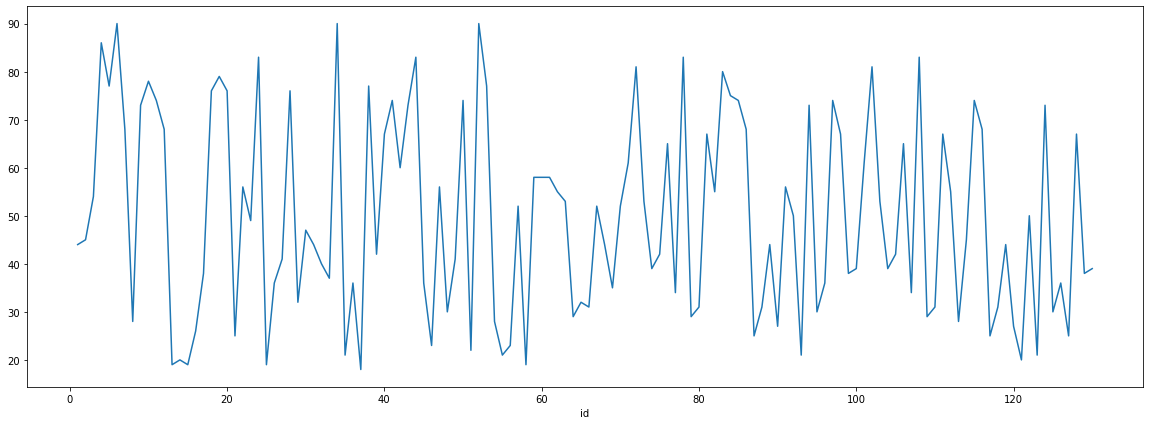

In [7]:
age.plot(figsize=(20,7))

<AxesSubplot:xlabel='id'>

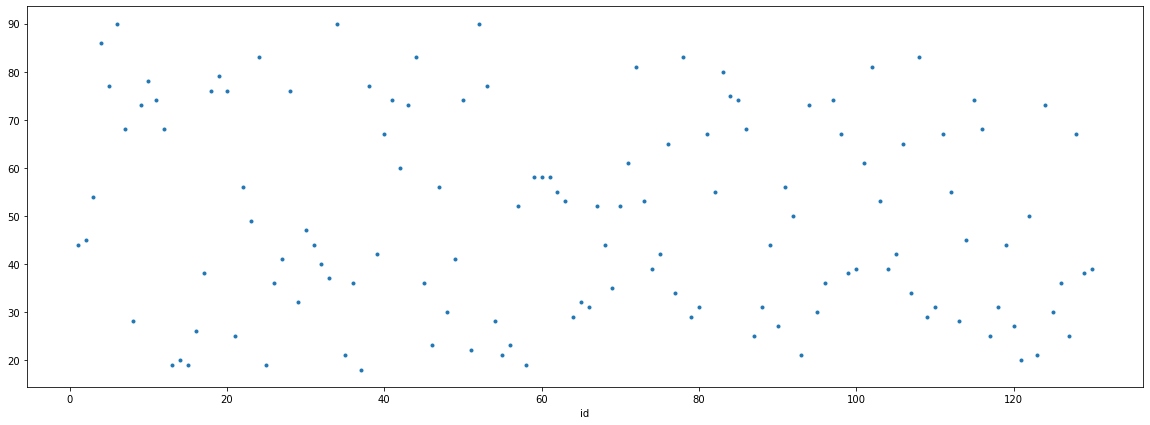

In [8]:
age.plot(style='.',figsize=(20,7))

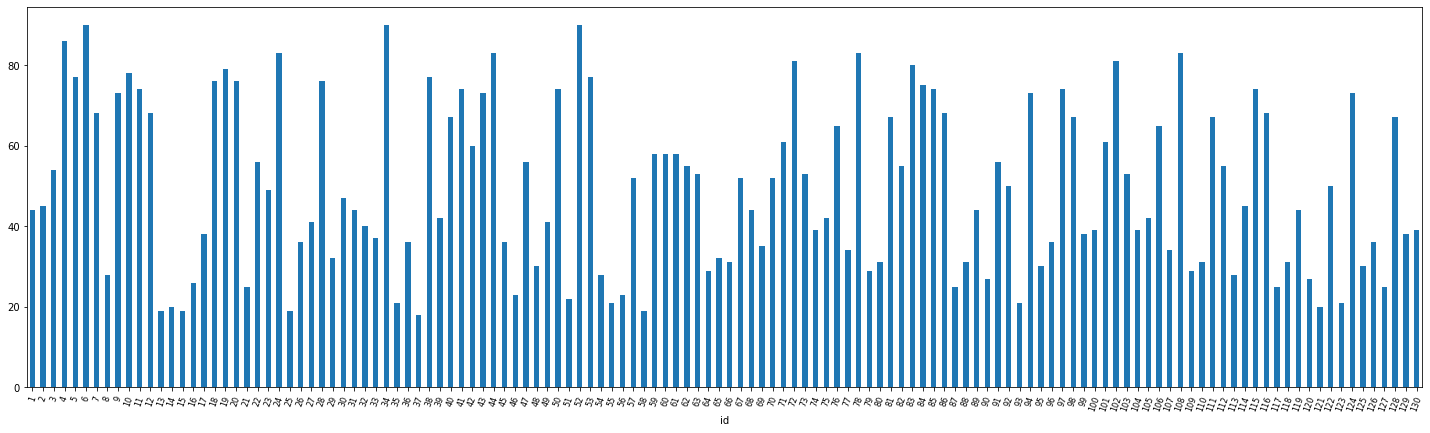

In [9]:
ax = age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [10]:
s_age = age.sort_values()
s_age.head()

id
37    18
25    19
15    19
13    19
58    19
Name: age, dtype: int64

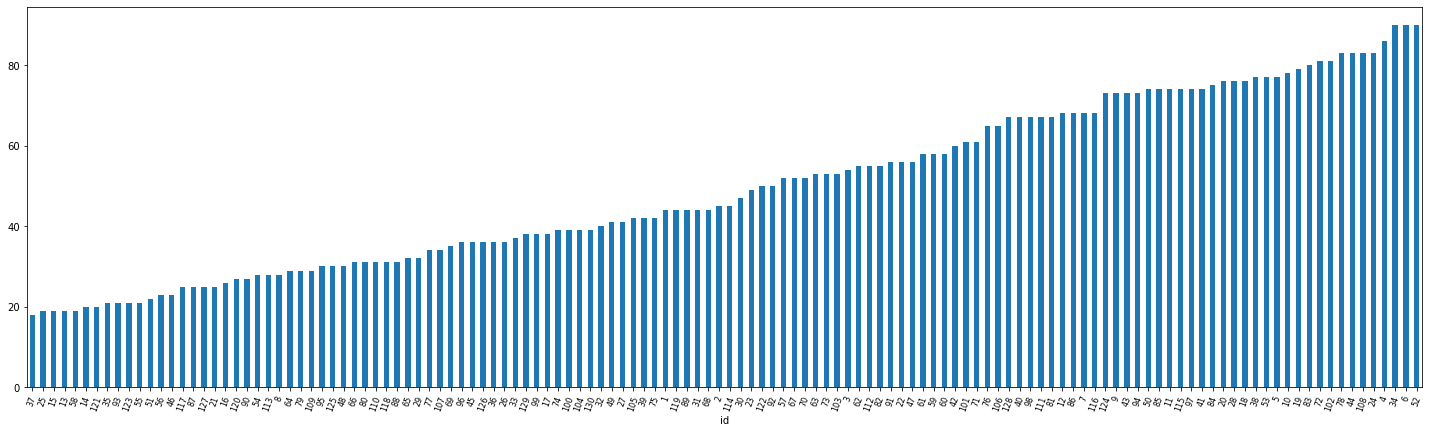

In [11]:
ax = s_age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

### Effectifs par valeur

Âge est traité comme variable quantitative discrète. C'est un cas limite car étant donné la quantité de valeurs différentes on pourrait aussi établir des classes et traiter l'âge comme variable quantitative continue.

À noter également que renseigner l'âge en années revient à créer des classes, les années en tant que classes, car l'âge peut aussi être mesurée en jours, ce qui est plus précis mais généralement moins significatif, du moins pour les humains.



In [12]:
cs_age = s_age.groupby(s_age).count()
print(type(cs_age))
cs_age.head()

<class 'pandas.core.series.Series'>


age
18    1
19    4
20    2
21    4
22    1
Name: age, dtype: int64

In [13]:
df_cs_age = pd.DataFrame(cs_age)
print(type(df_cs_age))
df_cs_age.head()

<class 'pandas.core.frame.DataFrame'>


,age
age,
18,1
19,4
20,2
21,4
22,1


In [14]:
df_cs_age.columns=['effectif']
df_cs_age.head(), df_cs_age.index[:5]

(     effectif
 age          
 18          1
 19          4
 20          2
 21          4
 22          1,
 Int64Index([18, 19, 20, 21, 22], dtype='int64', name='age'))

In [17]:
### Ajouter les effectifs cumulés
df_cs_age['effectif_cumule'] = df_cs_age['effectif'].cumsum()
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,1,1,0.77
19,4,5,3.08
20,2,7,1.54
21,4,11,3.08
22,1,12,0.77


### Fréquence et fréquence cumulée

In [18]:
### Calculer la fréquence

df_cs_age['frequence'] = (100 * df_cs_age['effectif'] \
                                   / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence
age,,,
18,1,1,0.77
19,4,5,3.08
20,2,7,1.54
21,4,11,3.08
22,1,12,0.77


In [19]:
df_cs_age['frequence_cumulee'] = (100 * df_cs_age['effectif_cumule'] \
                                / df_cs_age['effectif'].sum()).round(2)
df_cs_age.head()

,effectif,effectif_cumule,frequence,frequence_cumulee
age,,,,
18,1,1,0.77,0.77
19,4,5,3.08,3.85
20,2,7,1.54,5.38
21,4,11,3.08,8.46
22,1,12,0.77,9.23


### Représentations graphiques

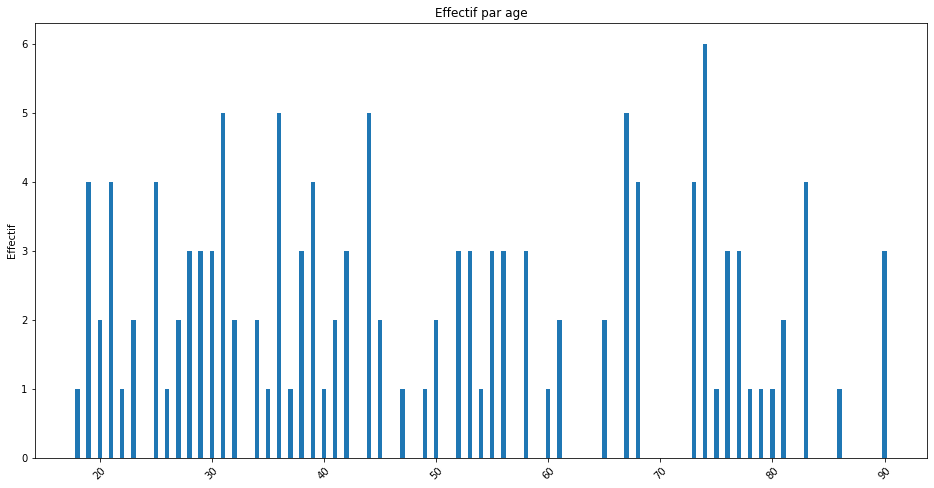

In [20]:
# Distribution par age

objects = df_cs_age.index
eff = df_cs_age['effectif']

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par age')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


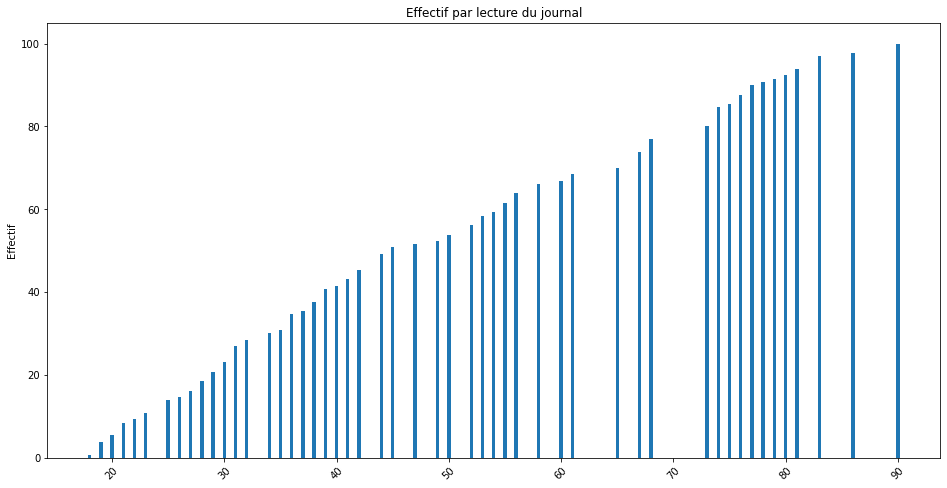

In [21]:
# Effectifs cumulés par age

objects = df_cs_age.index
#eff = df_cs_age['effectif_cumule']
eff = df_cs_age['frequence_cumulee']



p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


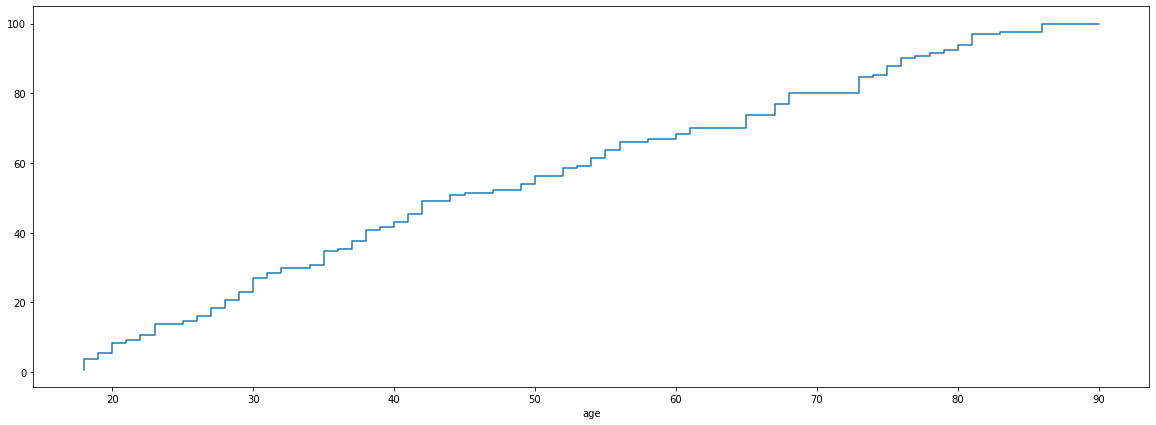

In [22]:
df_cs_age['frequence_cumulee'].plot(figsize=(20,7), drawstyle='steps') #  style='o--',
plt.draw()

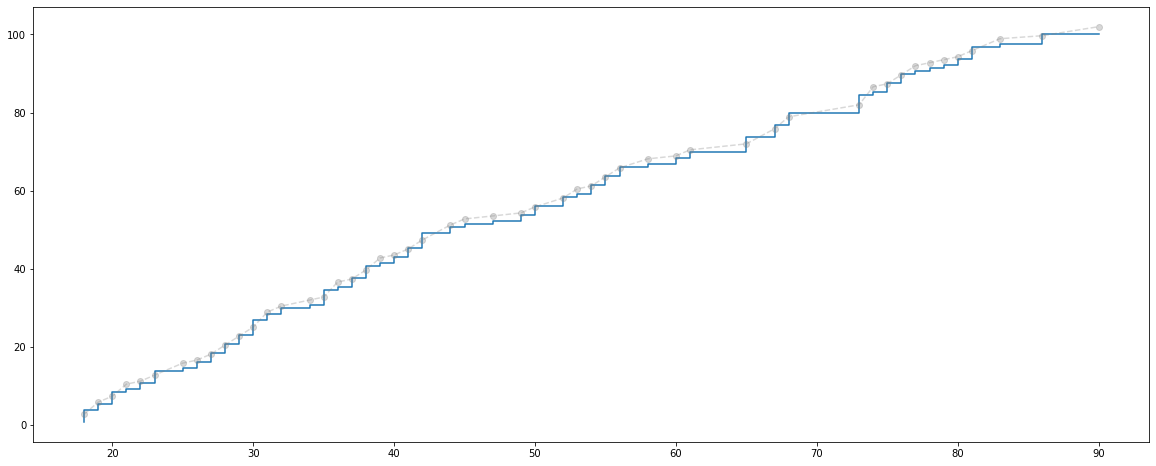

In [70]:
### Documentation
#   https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py
x = df_cs_age.index
y = df_cs_age['frequence_cumulee']
fig = plt.figure(figsize=[20,8])
plt.step(x, y, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)
plt.show()

## Paramètres de centralité et de dispersion

In [23]:
age.describe()

count    130.000000
mean      49.553846
std       20.757015
min       18.000000
25%       31.000000
50%       45.000000
75%       68.000000
max       90.000000
Name: age, dtype: float64

In [24]:
### La valeur la plus fréquente
age.mode()[0]

74

In [25]:
len(age[age == 74])

6

<AxesSubplot:>

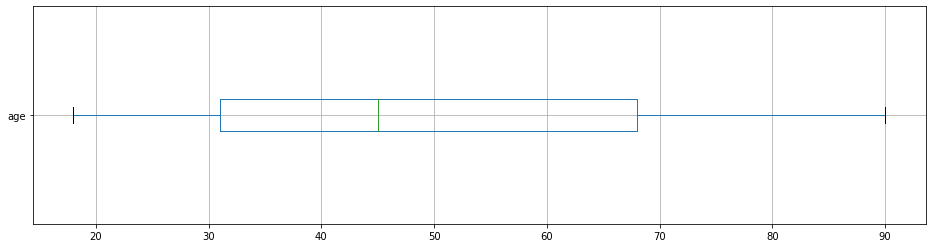

In [26]:
### Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

(18.0, 90.0)

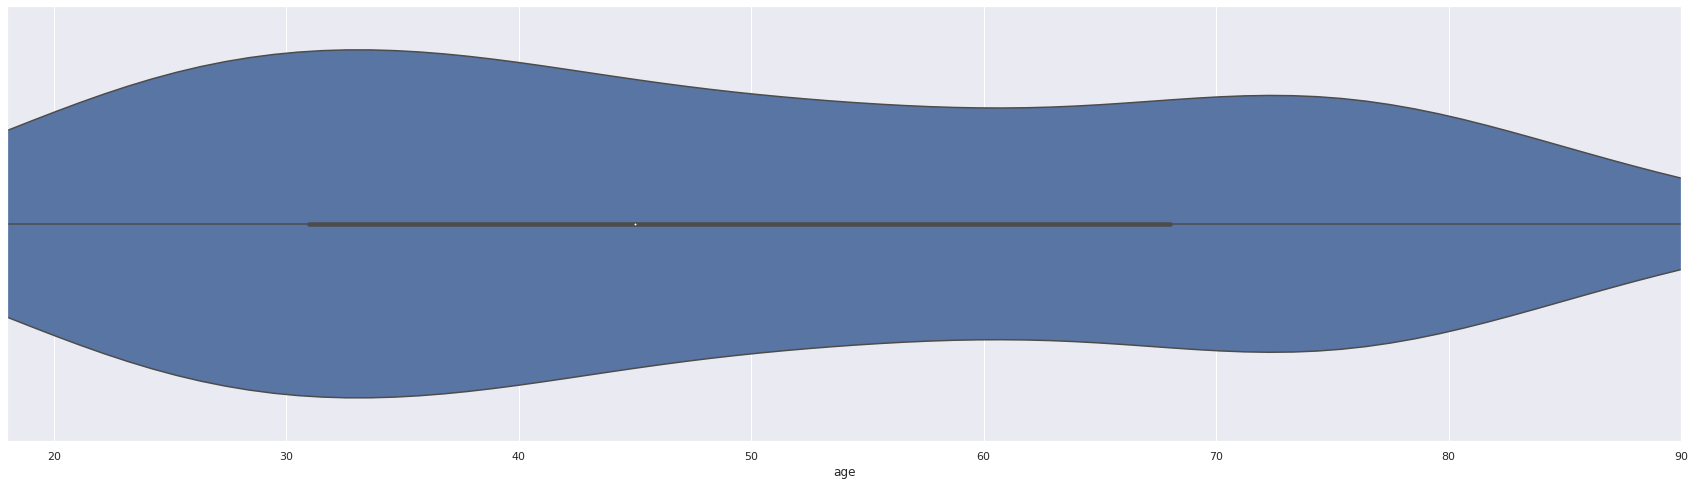

In [27]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs["age"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



### Histogramme

In [28]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[36, 46)"
2,45,1,tous les jours,droite,7364,"[36, 46)"
3,54,3,de temps en temps,droite,8947,"[46, 56)"
4,86,2,tous les jours,populiste,6317,"[66, 91)"
5,77,2,tous les jours,gauche,6511,"[66, 91)"


In [29]:
### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a enlevé une unité afin d'avoir des valeurs incluses

c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,36-45
2,45,1,tous les jours,droite,7364,36-45
3,54,3,de temps en temps,droite,8947,46-55
4,86,2,tous les jours,populiste,6317,66-90
5,77,2,tous les jours,gauche,6511,66-90


In [30]:
### Alternative : regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
gb_generation = pd.DataFrame(c_obs.groupby('generation').size())
gb_generation.columns = ['effectif']
gb_generation

,effectif
generation,
18-25,18
26-35,22
36-45,26
46-55,14
56-65,11
66-90,39


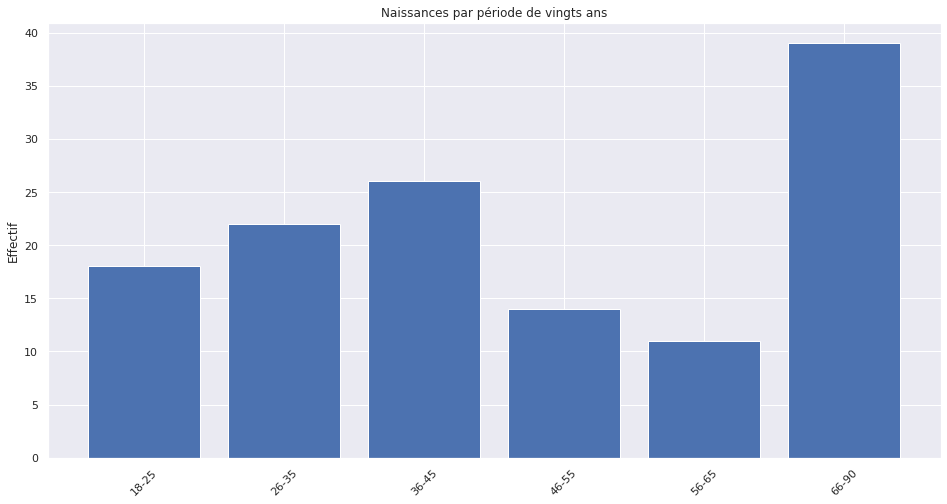

In [32]:
### Diagramme à barre, non adapté et trompeur: ce n'est pas un vrai histogramme
# Attention aux différentes étendues des ages, les densités des tranches sont différentes

objects = [l for l in gb_generation.index]
eff = [l for l in gb_generation['effectif']]

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title('Naissances par période de vingts ans')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [33]:
gb_generation = gb_generation.reset_index()
gb_generation

,generation,effectif
0,18-25,18
1,26-35,22
2,36-45,26
3,46-55,14
4,56-65,11
5,66-90,39


In [34]:
def calculer_densite(ligne):
    i = ligne['generation'].split('-')
    # print(i)
    ampl = int(i[1])-int(i[0])
    # print(ampl)
    d = round(ligne['frequence']/ampl,4)
    return(d)

In [35]:
gb_generation['frequence'] = (gb_generation['effectif'] \
                                   / gb_generation['effectif'].sum()).round(4)
gb_generation['densité'] = gb_generation.apply(calculer_densite, axis=1)
gb_generation['start'] = gb_generation.apply(lambda x : int(x['generation'].split('-')[0]), axis=1)
gb_generation['width'] = gb_generation.apply(lambda x : int(x['generation'].split('-')[1])-int(x['generation'].split('-')[0]), axis=1)
gb_generation

,generation,effectif,frequence,densité,start,width
0,18-25,18,0.1385,0.0198,18,7
1,26-35,22,0.1692,0.0188,26,9
2,36-45,26,0.2000,0.0222,36,9
3,46-55,14,0.1077,0.0120,46,9
4,56-65,11,0.0846,0.0094,56,9
5,66-90,39,0.3000,0.0125,66,24


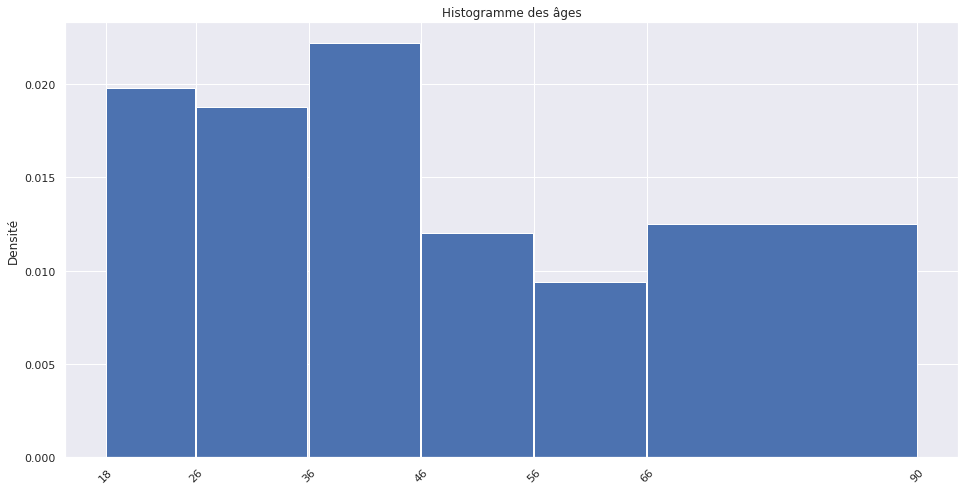

In [37]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire: à effectif égale aire égale
fig,ax = plt.subplots(1,1)

objects = [l for l in gb_generation['start']]
eff = [l for l in gb_generation['densité']]
width = [l+0.9 if l < 10 else l for l in gb_generation['width']]

p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks([18, 26, 36, 46, 56, 66, 90])
plt.ylabel('Densité')
plt.title('Histogramme des âges')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Exploration des revenus

Variable quantitative continue

In [38]:
revenu = obs['revenu_mensuel']
revenu.head()

id
1    9660
2    7364
3    8947
4    6317
5    6511
Name: revenu_mensuel, dtype: int64

In [39]:
s_revenu = revenu.sort_values()
s_revenu.head()

id
37     1400
25     1500
117    2000
55     2135
109    2500
Name: revenu_mensuel, dtype: int64

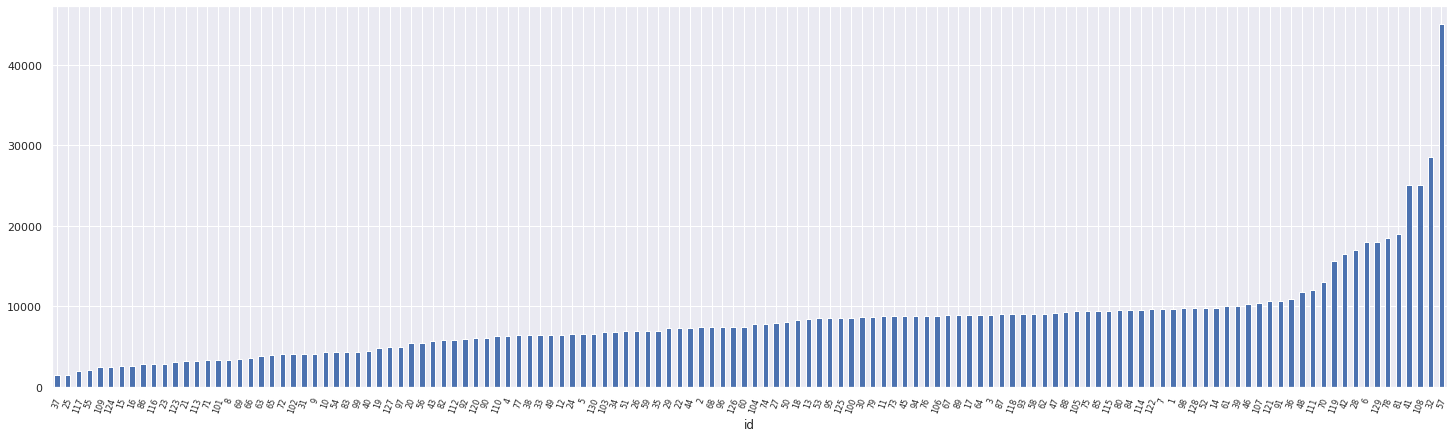

In [41]:
### Affichage ds revenus triés
ax = s_revenu.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [44]:
### Centralité et dispersion
revenu.describe().round(0)

count      130.0
mean      8262.0
std       5534.0
min       1400.0
25%       5037.0
50%       7656.0
75%       9451.0
max      45000.0
Name: revenu_mensuel, dtype: float64

(1400.0, 45000.0)

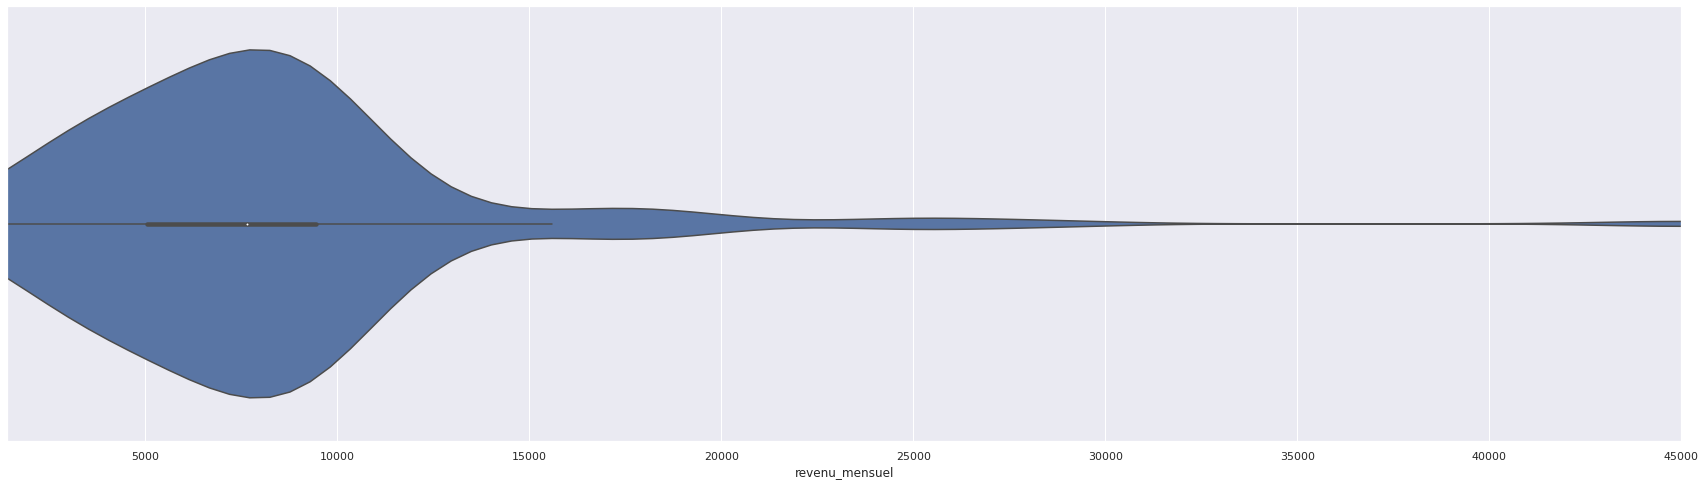

In [45]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs["revenu_mensuel"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [53]:
df_s_revenu = pd.DataFrame(s_revenu)
df_s_revenu['qcut'] = pd.qcut(df_s_revenu['revenu_mensuel'], 4)
df_s_revenu

,revenu_mensuel,qcut
id,,
37,1400,"(1399.999, 5036.75]"
25,1500,"(1399.999, 5036.75]"
117,2000,"(1399.999, 5036.75]"
55,2135,"(1399.999, 5036.75]"
109,2500,"(1399.999, 5036.75]"
...,...,...
81,19000,"(9451.25, 45000.0]"
41,25000,"(9451.25, 45000.0]"
108,25000,"(9451.25, 45000.0]"


In [54]:
gbdf_s_revenu = df_s_revenu.groupby(by='qcut').size()
gbdf_s_revenu = gbdf_s_revenu.reset_index()
gbdf_s_revenu.columns = ['qcut', 'effectif']
gbdf_s_revenu

,qcut,effectif
0,"(1399.999, 5036.75]",33
1,"(5036.75, 7655.5]",32
2,"(7655.5, 9451.25]",32
3,"(9451.25, 45000.0]",33


In [55]:
def calculer_densite_width(ligne):
    x = ligne['qcut']
    ampl = int(x.right) - int(x.left)
    right = int(x.right)
    left = int(x.left)
    d = round(ligne['frequence']/ampl,8)
    return([d, left, right, ampl])

In [56]:
gbdf_s_revenu['frequence'] = (gbdf_s_revenu['effectif'] \
                / gbdf_s_revenu['effectif'].sum()).round(6)
gbdf_s_revenu

,qcut,effectif,frequence
0,"(1399.999, 5036.75]",33,0.253846
1,"(5036.75, 7655.5]",32,0.246154
2,"(7655.5, 9451.25]",32,0.246154
3,"(9451.25, 45000.0]",33,0.253846


In [57]:
gbdf_s_revenu['dlrampl'] = gbdf_s_revenu.apply(calculer_densite_width, axis=1)
gbdf_s_revenu

,qcut,effectif,frequence,dlrampl
0,"(1399.999, 5036.75]",33,0.253846,"[6.98e-05, 1399, 5036, 3637]"
1,"(5036.75, 7655.5]",32,0.246154,"[9.399e-05, 5036, 7655, 2619]"
2,"(7655.5, 9451.25]",32,0.246154,"[0.00013706, 7655, 9451, 1796]"
3,"(9451.25, 45000.0]",33,0.253846,"[7.14e-06, 9451, 45000, 35549]"


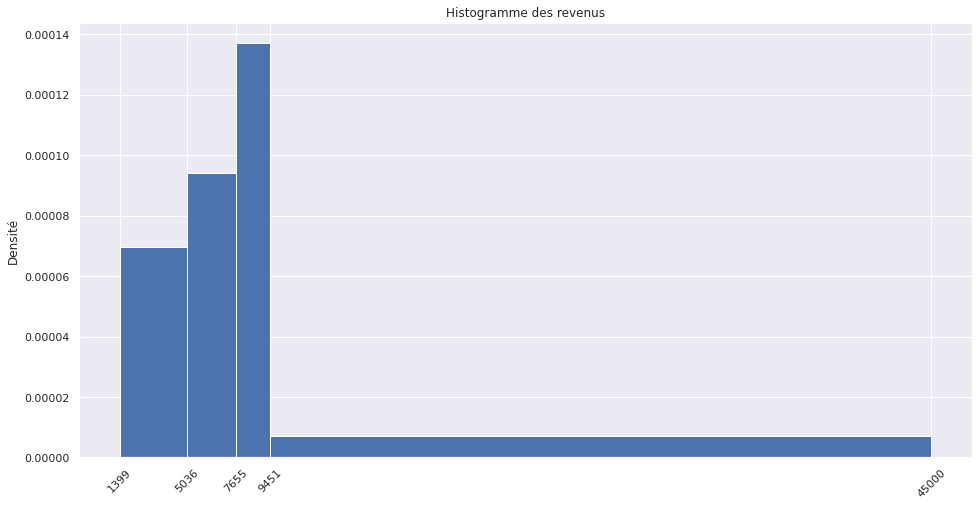

In [60]:
### Histogramme
# La hauteur des barres, en abscisses, représente la densité non l'effectif, 
# l'effectif est représenté par l'aire
##  Noter le nombre élevé de revenus autour de 8000 CHF

fig,ax = plt.subplots(1,1)

objects = [l[1] for l in gbdf_s_revenu['dlrampl']]
eff = [l[0] for l in gbdf_s_revenu['dlrampl']]
width = [l[3]  for l in gbdf_s_revenu['dlrampl']]


p1 = plt.bar(objects, eff, width = width, align="edge")
ax.set_xticks(objects + [[l[2] for l in gbdf_s_revenu['dlrampl']][-1]])
plt.ylabel('Densité')
plt.title('Histogramme des revenus')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


[118.   8.   3.   1.]


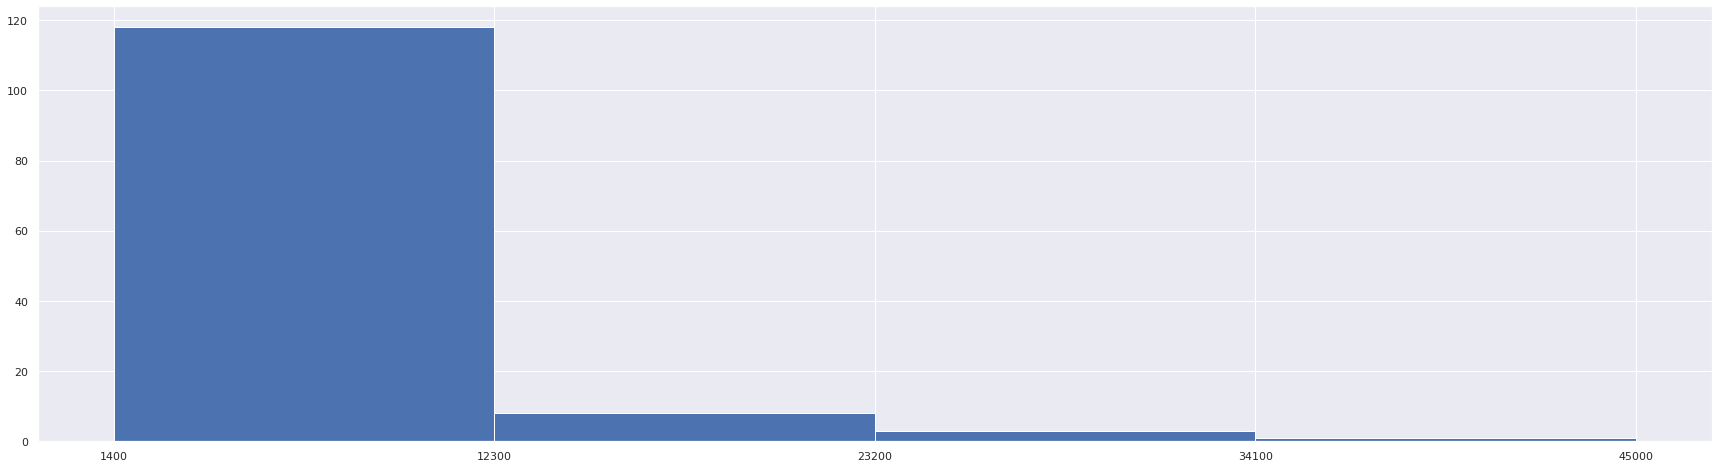

In [61]:
### Le graphique par défaut de Matplotlib, 
#  ne met pas en évidence la spécificité de la distribution,
#  i.e. le nombre élevé de revenus autour de 8000 CHF
n, bins, patches = plt.hist(s_revenu, bins=4, density=False)
print(n)
plt.xticks(bins)
plt.show()

## Regrouper et analyser les variables qualitatives

### Parti politique

In [62]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
droite        18
gauche        23
centre        25
populiste     30
écologiste    34
dtype: int64

In [63]:
df_partis = pd.DataFrame(sgb_parti)
df_partis.reset_index(inplace=True)
df_partis

,parti,0
0,droite,18
1,gauche,23
2,centre,25
3,populiste,30
4,écologiste,34


In [65]:
df_partis.columns = ['parti','effectif']
df_partis['code_parti'] = [4,2,3,5,1]
# df_partis.reset_index('parti').set_index('code_parti')
df_partis

,parti,effectif,code_parti
0,droite,18,4
1,gauche,23,2
2,centre,25,3
3,populiste,30,5
4,écologiste,34,1


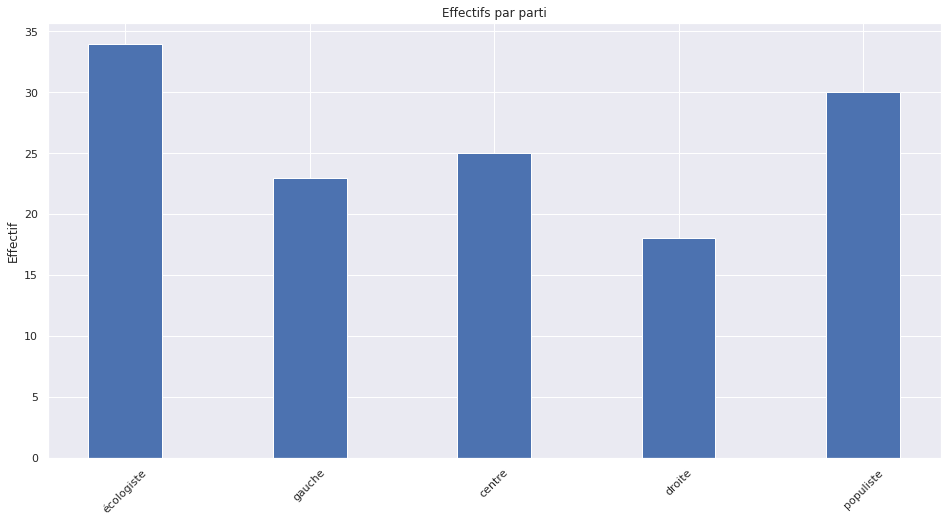

In [66]:
# Distribution par parti

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]



p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


### Fréquence de lecture d'un journal

In [67]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = True)
sgb_lecture_journal

lecture_journal
de temps en temps                17
tous les jours                   19
le week-end                      29
très rarement                    30
trois-quatre fois par semaine    35
dtype: int64

In [68]:
sgb_lecture_journal

lecture_journal
de temps en temps                17
tous les jours                   19
le week-end                      29
très rarement                    30
trois-quatre fois par semaine    35
dtype: int64

In [69]:
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [2,5,1,3,4]
df_lecture_journal

,lecture,effectif,code_lecture
0,de temps en temps,17,2
1,tous les jours,19,5
2,le week-end,29,1
3,très rarement,30,3
4,trois-quatre fois par semaine,35,4


In [70]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
list(df_lecture_journal['lecture'])

['le week-end',
 'de temps en temps',
 'très rarement',
 'trois-quatre fois par semaine',
 'tous les jours']

In [71]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
2,le week-end,29,1,29
0,de temps en temps,17,2,46
3,très rarement,30,3,76
4,trois-quatre fois par semaine,35,4,111
1,tous les jours,19,5,130


In [72]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
2,le week-end,29,1,29,22.31
0,de temps en temps,17,2,46,13.08
3,très rarement,30,3,76,23.08
4,trois-quatre fois par semaine,35,4,111,26.92
1,tous les jours,19,5,130,14.62


In [73]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,le week-end,29,1,29,22.31,22.31
0,de temps en temps,17,2,46,13.08,35.38
3,très rarement,30,3,76,23.08,58.46
4,trois-quatre fois par semaine,35,4,111,26.92,85.38
1,tous les jours,19,5,130,14.62,100.00


In [74]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,le week-end,29,1,29,22.31,22.31
0,de temps en temps,17,2,46,13.08,35.38
3,très rarement,30,3,76,23.08,58.46
4,trois-quatre fois par semaine,35,4,111,26.92,85.38
1,tous les jours,19,5,130,14.62,100.00


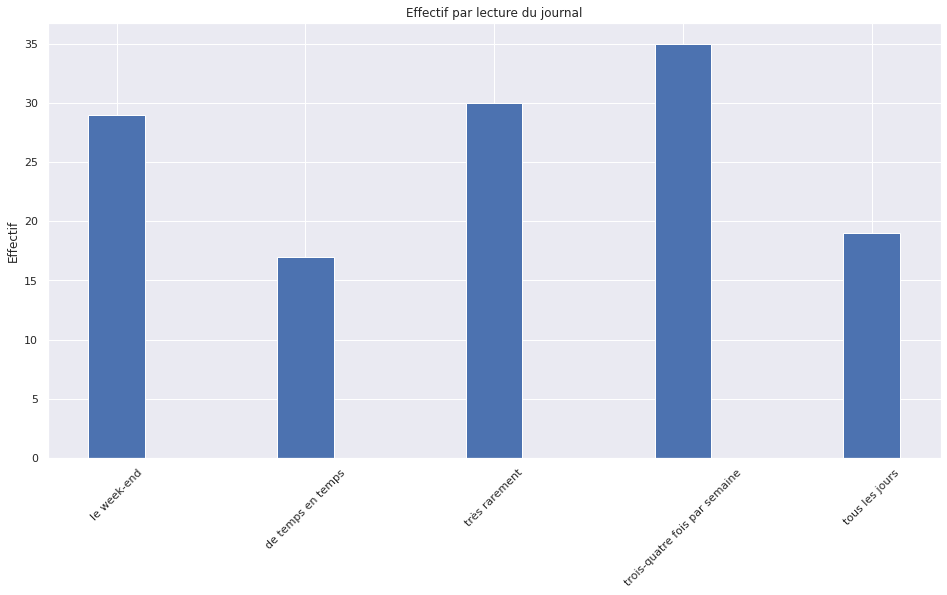

In [75]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


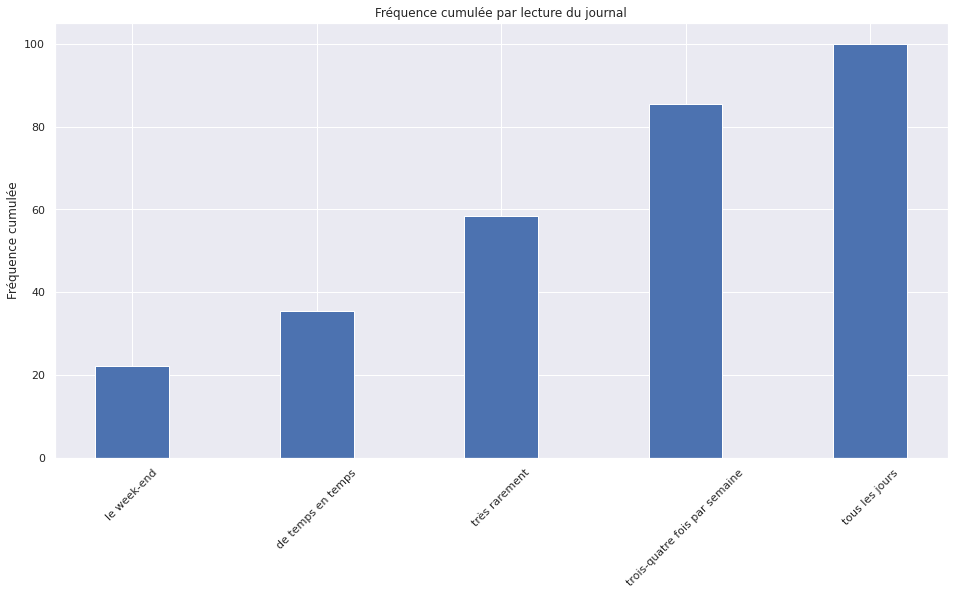

In [76]:
# Distribution par lecture journal: fréquence cumulée

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [82]:
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,lecture_journal_codes
id,,,,,,
1,44,3,de temps en temps,droite,9660,2
2,45,1,tous les jours,droite,7364,5
3,54,3,de temps en temps,droite,8947,2
4,86,2,tous les jours,populiste,6317,5
5,77,2,tous les jours,gauche,6511,5


In [86]:
###  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
obs['lecture_journal_codes'] = obs['lecture_journal']\
    .replace(['très rarement','de temps en temps','le week-end','trois-quatre fois par semaine','tous les jours'],[1,2,3,4,5])
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,lecture_journal_codes
id,,,,,,
1,44,3,de temps en temps,droite,9660,2
2,45,1,tous les jours,droite,7364,5
3,54,3,de temps en temps,droite,8947,2
4,86,2,tous les jours,populiste,6317,5
5,77,2,tous les jours,gauche,6511,5


(1.0, 5.0)

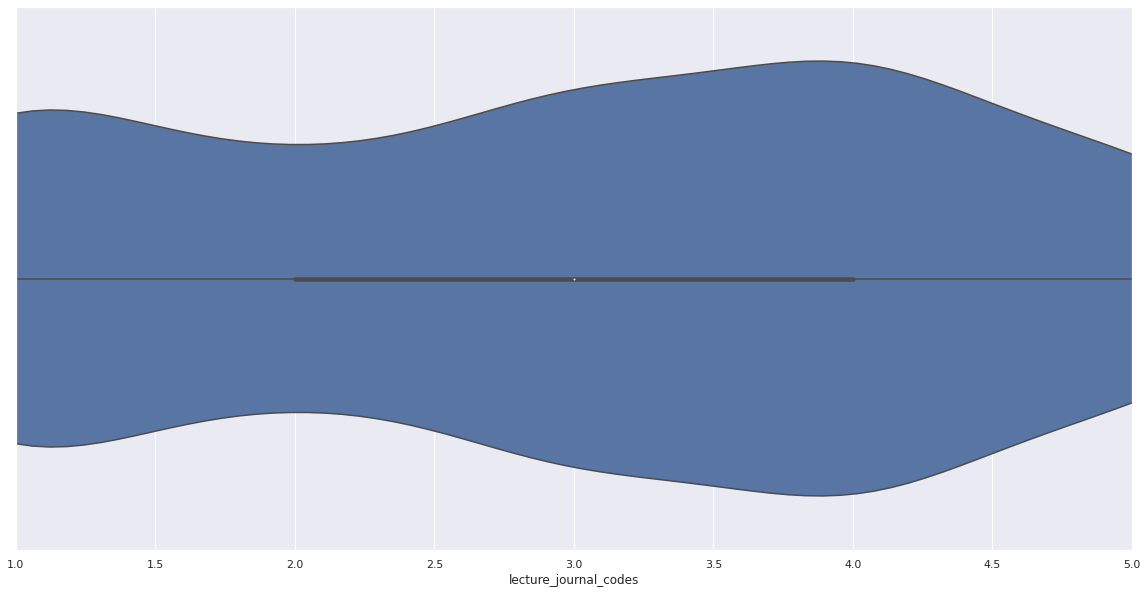

In [79]:
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 10)})

l = obs["lecture_journal_codes"]

ax = sns.violinplot(x=l)
ax.set_xlim(left=min(l), right=max(l))



# Comparaison de deux variables quantitatives

In [29]:
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [30]:
obs['n_foyer'].describe()

count    130.000000
mean       2.153846
std        1.171109
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: n_foyer, dtype: float64

<AxesSubplot:>

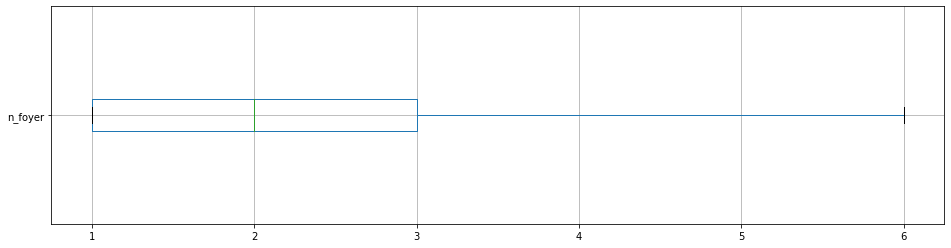

In [31]:
obs.boxplot(column=['n_foyer'], vert=False, figsize=(16,4))

In [32]:
obs['revenu_mensuel'].describe()

count      130.000000
mean      7048.969231
std       2553.219472
min       1400.000000
25%       5007.000000
50%       7383.500000
75%       9016.500000
max      11728.000000
Name: revenu_mensuel, dtype: float64

<AxesSubplot:>

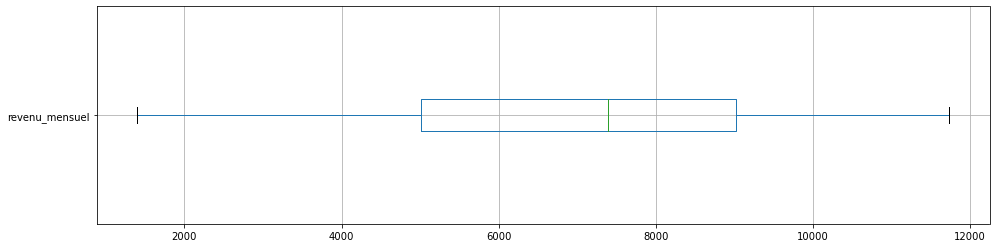

In [33]:
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

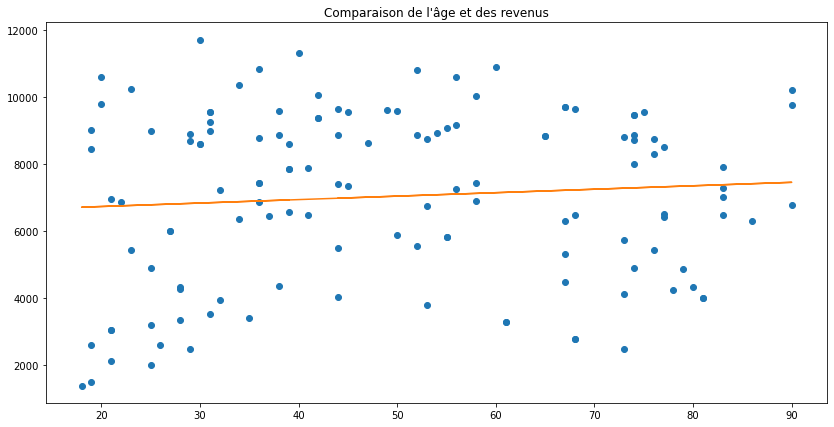

In [34]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs['age'])
y = np.array(obs['revenu_mensuel'])


plt.rcParams["figure.figsize"] = [14, 7]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)


In [35]:
### Coéfficient de corrélation de Pearsons 
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.08388479691005621

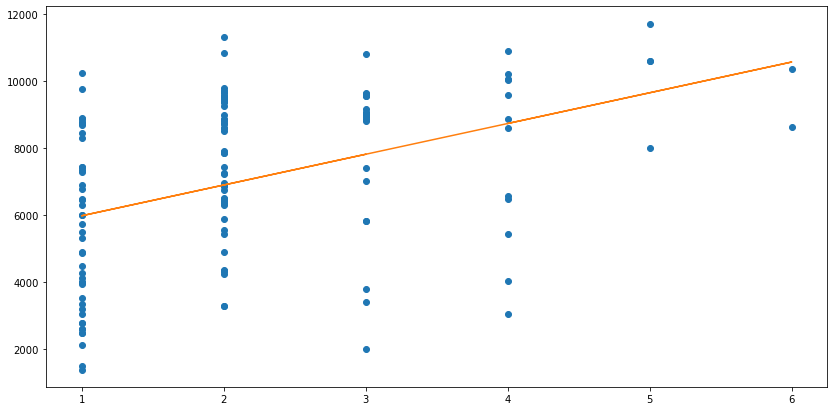

In [36]:
x = np.array(obs['n_foyer'])
y = np.array(obs['revenu_mensuel'])

plt.rcParams["figure.figsize"] = [14, 7]

plt.plot(x, y, 'o')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

In [37]:
### Pearson Correlation Coefficient
# https://www.statology.org/pearson-correlation-coefficient/

r = np.corrcoef([x,y])[0][1]
r

0.42123680524320944

In [38]:
len(obs)

130

In [39]:
### https://www.statology.org/pearson-correlation-coefficient/
T = r * np.sqrt((len(obs)-2) / (1-r))
T

6.264419640438374

In [40]:
### p value
# https://www.statology.org/t-score-p-value-calculator/


# Variable qualitative et quantitative

Text(0, 0.5, 'Parti politique')

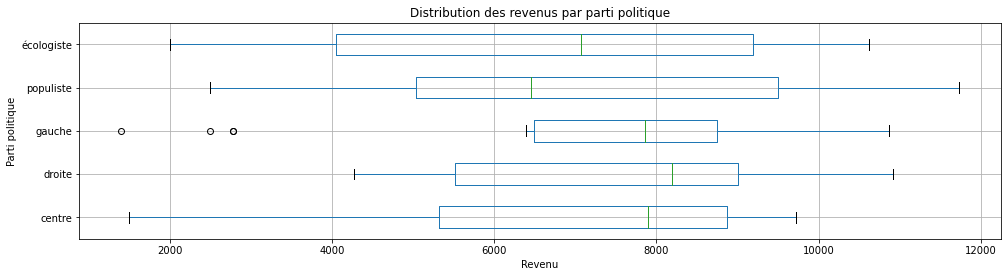

In [41]:
axes = obs.boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4))

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')


In [42]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count       30.000000
mean      6998.600000
std       2600.905049
min       2500.000000
25%       5036.750000
50%       6447.000000
75%       9494.250000
max      11728.000000
Name: revenu_mensuel, dtype: float64

# Deux variables qualitatives


* Hamon, Chapitre 4, 99-111


In [43]:
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,41-61
2,45,1,tous les jours,droite,7364,41-61
3,54,3,de temps en temps,droite,8947,41-61
4,86,2,tous les jours,populiste,6317,81-101
5,77,2,tous les jours,gauche,6511,61-81


### Tableau de contingence

In [44]:
### Le type d'origine est 'category' il faut transformer en 'str'
##  pour éviter le message d'erreur en créant la pivot_table
c_obs['generation']= c_obs['generation'].astype(str)

In [45]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "parti"  # "0"
Y = "generation"

c_obs_parti_generation = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parti_generation

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
0-21,2,2,1,0,2,7
21-41,3,3,12,8,21,47
41-61,6,8,4,10,5,33
61-81,12,3,5,7,6,33
81-101,2,2,1,5,0,10
Total,25,18,23,30,34,130


In [46]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

c_obs_parti_generation_frequence = np.round(c_obs_parti_generation*100/c_obs_parti_generation.iloc[-1,-1],1)
c_obs_parti_generation_frequence

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
0-21,1.5,1.5,0.8,0.0,1.5,5.4
21-41,2.3,2.3,9.2,6.2,16.2,36.2
41-61,4.6,6.2,3.1,7.7,3.8,25.4
61-81,9.2,2.3,3.8,5.4,4.6,25.4
81-101,1.5,1.5,0.8,3.8,0.0,7.7
Total,19.2,13.8,17.7,23.1,26.2,100.0


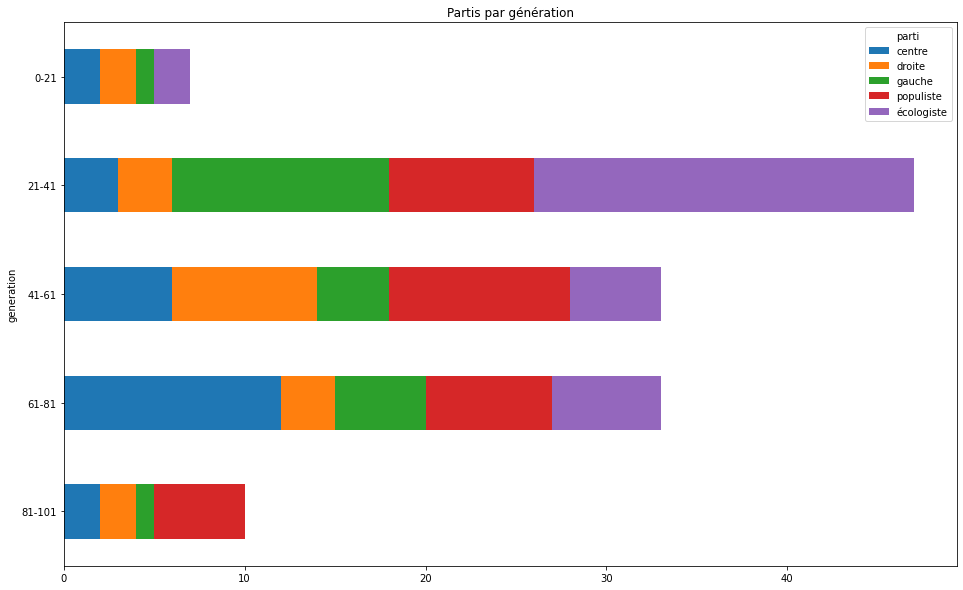

In [47]:
g = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = 'Partis par génération')

In [49]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des lignes
stacked_data = c_obs_parti_generation.apply(lambda x: x*100/sum(x)*2, axis=1) # axis=0
stacked_data

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
0-21,28.571429,28.571429,14.285714,0.000000,28.571429,100.0
21-41,6.382979,6.382979,25.531915,17.021277,44.680851,100.0
41-61,18.181818,24.242424,12.121212,30.303030,15.151515,100.0
61-81,36.363636,9.090909,15.151515,21.212121,18.181818,100.0
81-101,20.000000,20.000000,10.000000,50.000000,0.000000,100.0
Total,19.230769,13.846154,17.692308,23.076923,26.153846,100.0


parti          centre     droite     gauche  populiste  écologiste
generation                                                        
0-21        28.571429  28.571429  14.285714   0.000000   28.571429
21-41        6.382979   6.382979  25.531915  17.021277   44.680851
41-61       18.181818  24.242424  12.121212  30.303030   15.151515
61-81       36.363636   9.090909  15.151515  21.212121   18.181818
81-101      20.000000  20.000000  10.000000  50.000000    0.000000
Total       19.230769  13.846154  17.692308  23.076923   26.153846


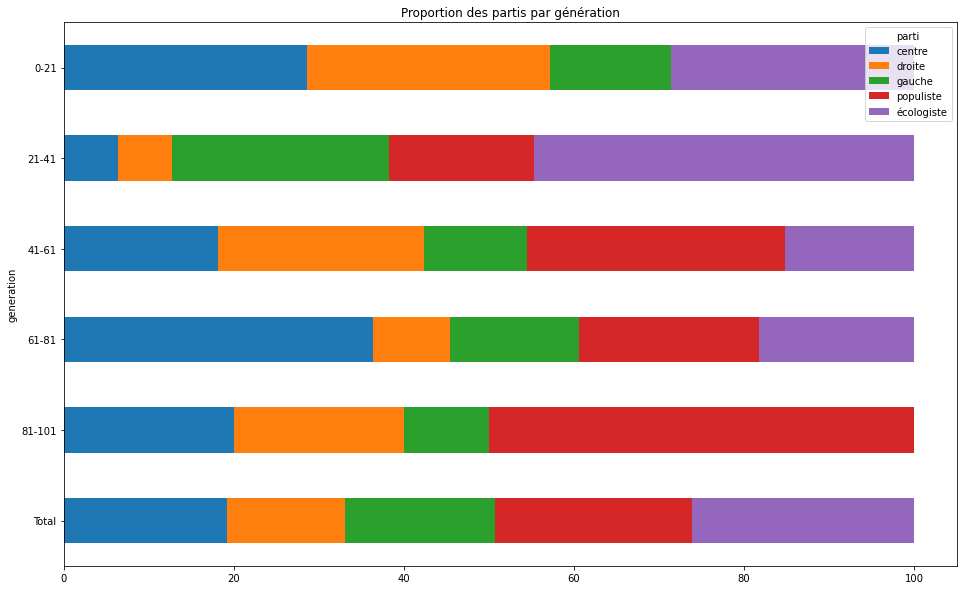

In [50]:
print(stacked_data.iloc[0:, 0:-1])

plot = stacked_data.iloc[0:, 0:-1].sort_values(by=Y, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

In [51]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data = c_obs_parti_generation.apply(lambda x: x*100/sum(x)*2, axis=0) # axis=0  1
stacked_data.transpose()

generation,0-21,21-41,41-61,61-81,81-101,Total
parti,,,,,,
centre,8.000000,12.000000,24.000000,48.000000,8.000000,100.0
droite,11.111111,16.666667,44.444444,16.666667,11.111111,100.0
gauche,4.347826,52.173913,17.391304,21.739130,4.347826,100.0
populiste,0.000000,26.666667,33.333333,23.333333,16.666667,100.0
écologiste,5.882353,61.764706,14.705882,17.647059,0.000000,100.0
Total,5.384615,36.153846,25.384615,25.384615,7.692308,100.0


parti       centre     droite     gauche  populiste  écologiste      Total
generation                                                                
0-21           8.0  11.111111   4.347826   0.000000    5.882353   5.384615
21-41         12.0  16.666667  52.173913  26.666667   61.764706  36.153846
41-61         24.0  44.444444  17.391304  33.333333   14.705882  25.384615
61-81         48.0  16.666667  21.739130  23.333333   17.647059  25.384615
81-101         8.0  11.111111   4.347826  16.666667    0.000000   7.692308


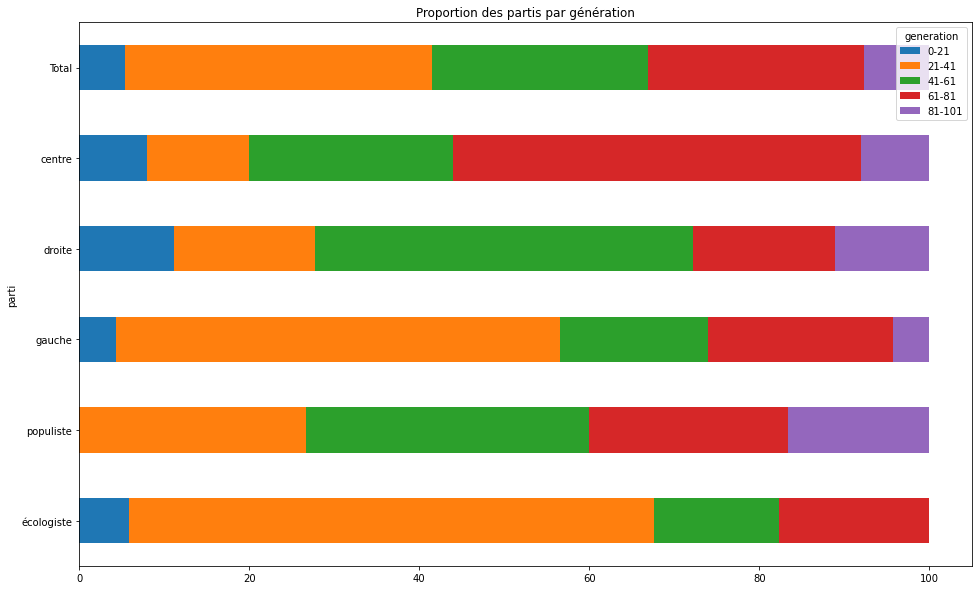

In [52]:
print(stacked_data.iloc[0:-1, 0:])

plot = stacked_data.iloc[0:-1, 0:].transpose().sort_values(by=X, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### Tableau en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [54]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_generation.iat[-1,-1]

130

In [58]:
tx = c_obs_parti_generation.loc[:,["Total"]]
ty = c_obs_parti_generation.loc[["Total"],:]
n = c_obs_parti_generation.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


parti       centre  droite  gauche  populiste  écologiste  Total
generation                                                      
0-21             1       0       1          1           1      7
21-41            9       6       8         10          12     47
41-61            6       4       5          7           8     33
61-81            6       4       5          7           8     33
81-101           1       1       1          2           2     10
Total           25      18      23         30          34    130


In [72]:
c_obs_parti_generation.iloc([:,:])

SyntaxError: invalid syntax (<ipython-input-72-9d4d38313e00>, line 1)

In [74]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_generation-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


parti       centre  droite  gauche  populiste  écologiste
generation                                               
0-21             0       1       0         -1           0
21-41           -6      -3       3         -2           8
41-61            0       3      -1          2          -3
61-81            5      -1       0          0          -2
81-101           0       0       0          2          -2


In [75]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (c_obs_parti_generation-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
0-21,0.317582,1.096215,0.045915,1.615385,0.015643
21-41,4.034206,1.890671,1.632683,0.746863,6.168403
41-61,0.018881,2.575965,0.578909,0.746698,1.527382
61-81,5.037063,0.538928,0.120411,0.049728,0.801892
81-101,0.003077,0.273504,0.334448,3.141026,2.615385


35.926864201160335


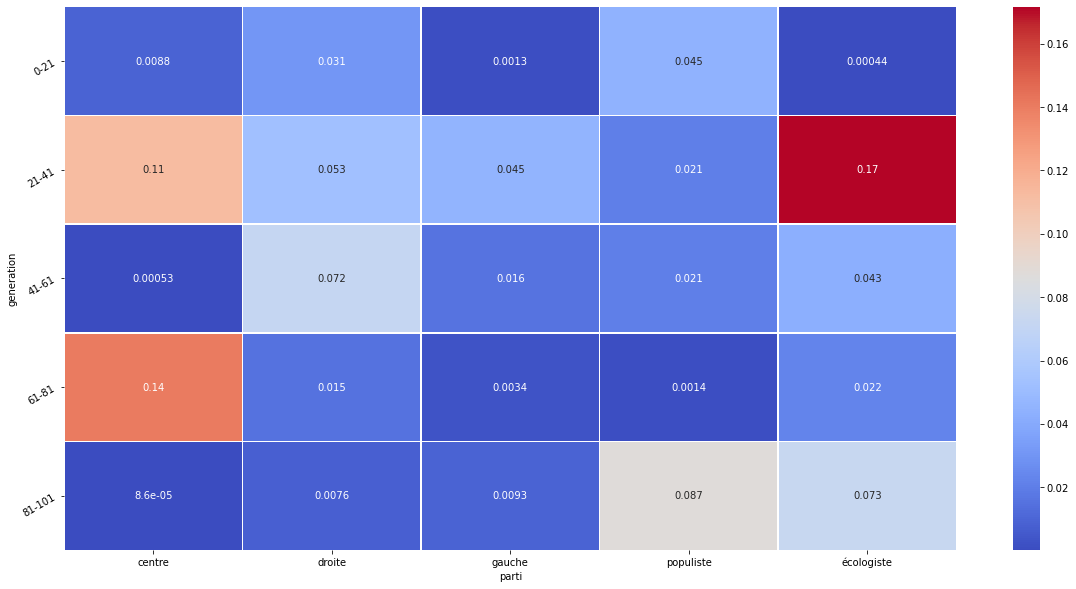

In [79]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

### Appartenance politique et fréquence de lecture du journal

In [80]:
X = "parti"  # "0"
Y = "lecture_journal"

c_obs_parti_lecture = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_lecture

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,Total
parti,,,,,,
centre,5,6,3,6,5,25
droite,2,6,3,4,3,18
gauche,3,3,2,5,10,23
populiste,4,9,3,9,5,30
écologiste,3,7,6,11,7,34
Total,17,31,17,35,30,130


In [81]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_lecture.iat[-1,-1]

130

In [82]:
c_obs_parti_lecture.iloc[:-1,:-1]

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement
parti,,,,,
centre,5,6,3,6,5
droite,2,6,3,4,3
gauche,3,3,2,5,10
populiste,4,9,3,9,5
écologiste,3,7,6,11,7


In [83]:
tx = c_obs_parti_lecture.loc[:,["Total"]]
ty = c_obs_parti_lecture.loc[["Total"],:]
n = c_obs_parti_lecture.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


lecture_journal  de temps en temps  le week-end  tous les jours  \
parti                                                             
centre                           3            5               3   
droite                           2            4               2   
gauche                           3            5               3   
populiste                        3            7               3   
écologiste                       4            8               4   
Total                           17           31              17   

lecture_journal  trois-quatre fois par semaine  très rarement  Total  
parti                                                                 
centre                                       6              5     25  
droite                                       4              4     18  
gauche                                       6              5     23  
populiste                                    8              6     30  
écologiste                           

In [77]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal  de temps en temps  le week-end  tous les jours  \
parti                                                             
centre                           1            0               0   
droite                           0            1               0   
gauche                           0           -2              -1   
populiste                        0            1               0   
écologiste                      -1           -1               1   

lecture_journal  trois-quatre fois par semaine  très rarement  
parti                                                          
centre                                       0              0  
droite                                       0             -1  
gauche                                      -1              4  
populiste                                    0             -1  
écologiste                                   1              0  


In [80]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = ((c_obs_parti_lecture-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement
parti,,,,,
centre,0.916290,0.000248,0.022172,0.079341,0.102564
droite,0.053193,0.679404,0.177376,0.147741,0.320513
gauche,0.000020,1.125569,0.337616,0.229575,4.148272
populiste,0.001508,0.476427,0.217195,0.105495,0.534188
écologiste,0.470375,0.151336,0.543040,0.372334,0.091252


11.303040314550042


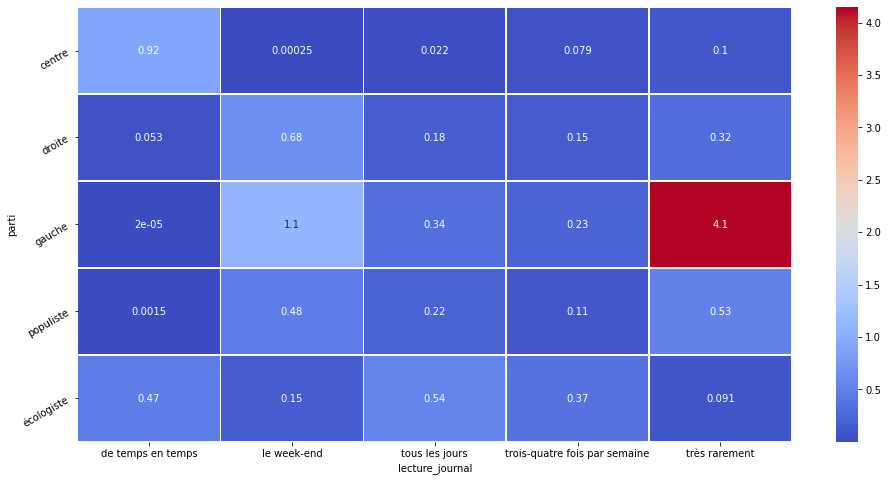

In [82]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(16,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index
p = g.set_yticklabels(labels, rotation=30)